In [118]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os



# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


**Clustering**

**Introduction – Classification vs Clustering**

In [2]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()

X = data.data
y = data.target

data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


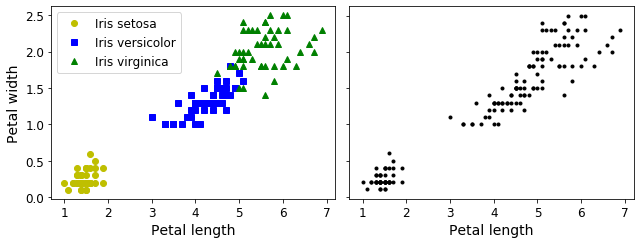

In [5]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()


In [7]:
from sklearn.mixture import GaussianMixture

In [32]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([1, 2, 0]) # correct permutation of labels
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

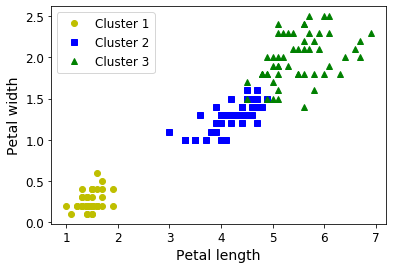

In [33]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()


In [31]:
np.sum(y_pred==y) / len(y_pred)


0.9666666666666667

**K-Means**

In [34]:
from sklearn.datasets import make_blobs

In [35]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


In [36]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


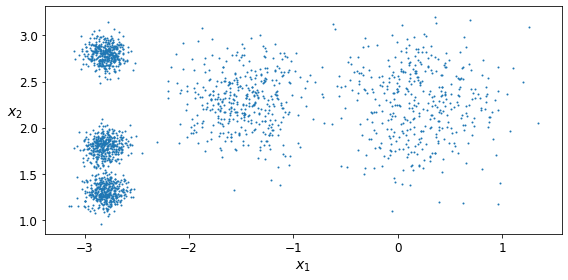

In [37]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

In [38]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
# Each instance is asaigned to one of k clusters

In [39]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [41]:
y_pred is kmeans.labels_

True

In [43]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [44]:
# Prediction of labels for new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

**Decision Boundaries**

In [45]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


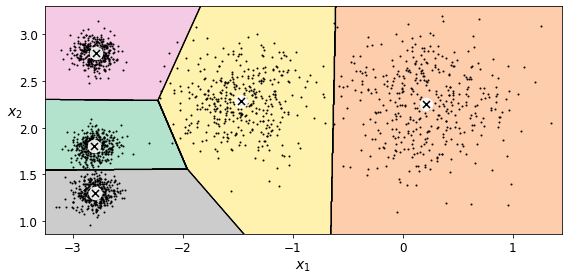

In [46]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

**Hard Clustering vs Soft Clustering**

In [47]:
# Rather than arbitrarily choosing the closest cluster for each instance, 
# which is called hard clustering, it might be better 
# to measure the distance of each instance to all 5 centroids. 

kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [48]:
# it's calculated by Euclidian distance
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

**K-Means Algorithm**


First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
    Repeat until convergence (i.e., until the centroids stop moving):
        Assign each instance to the closest centroid.
        Update the centroids to be the mean of the instances that are assigned to them.


In [49]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

Saving figure kmeans_algorithm_plot


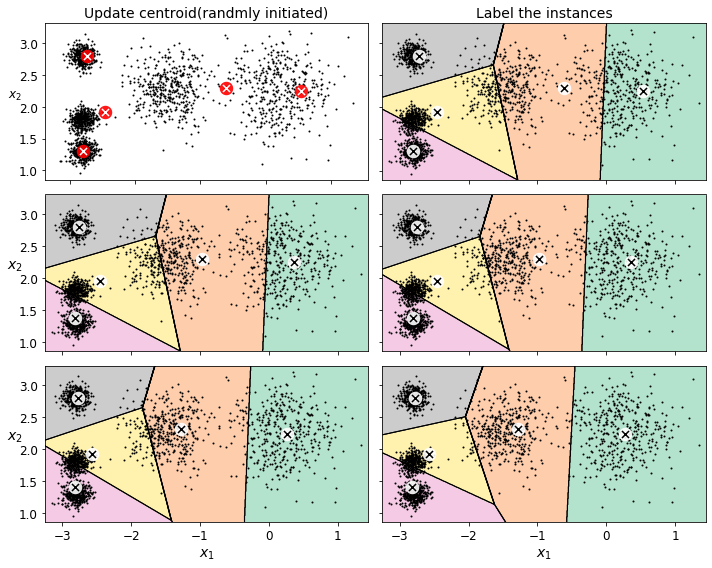

In [58]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color="r", cross_color="w")
plt.ylabel("$x_2$", fontsize=12, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update centroid(randmly initiated)", fontsize=14)


plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")

plt.show()

**K-Means Variability**

When running kmean multiple times it can converge to different values

In [132]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

def plot_clusterers_comparison(clusterers, X):
    for clusterer in clusterers:
        clusterer.fit(X)

    num_clusterers = len(clusterers)
    columns = 3
    rows = num_clusterers // columns
    
    plt.figure(figsize=(10*columns, 6*rows))

    for index, clusterer in enumerate(clusterers):
        plt.subplot(rows + 1, columns, index + 1)
        plot_decision_boundaries(clusterer, X)
        plt.title(f"cluster {index+1},k={clusterer.n_clusters}, inertia={clusterer.inertia_}", fontsize=14)

        
        

Saving figure kmeans_variability_plot


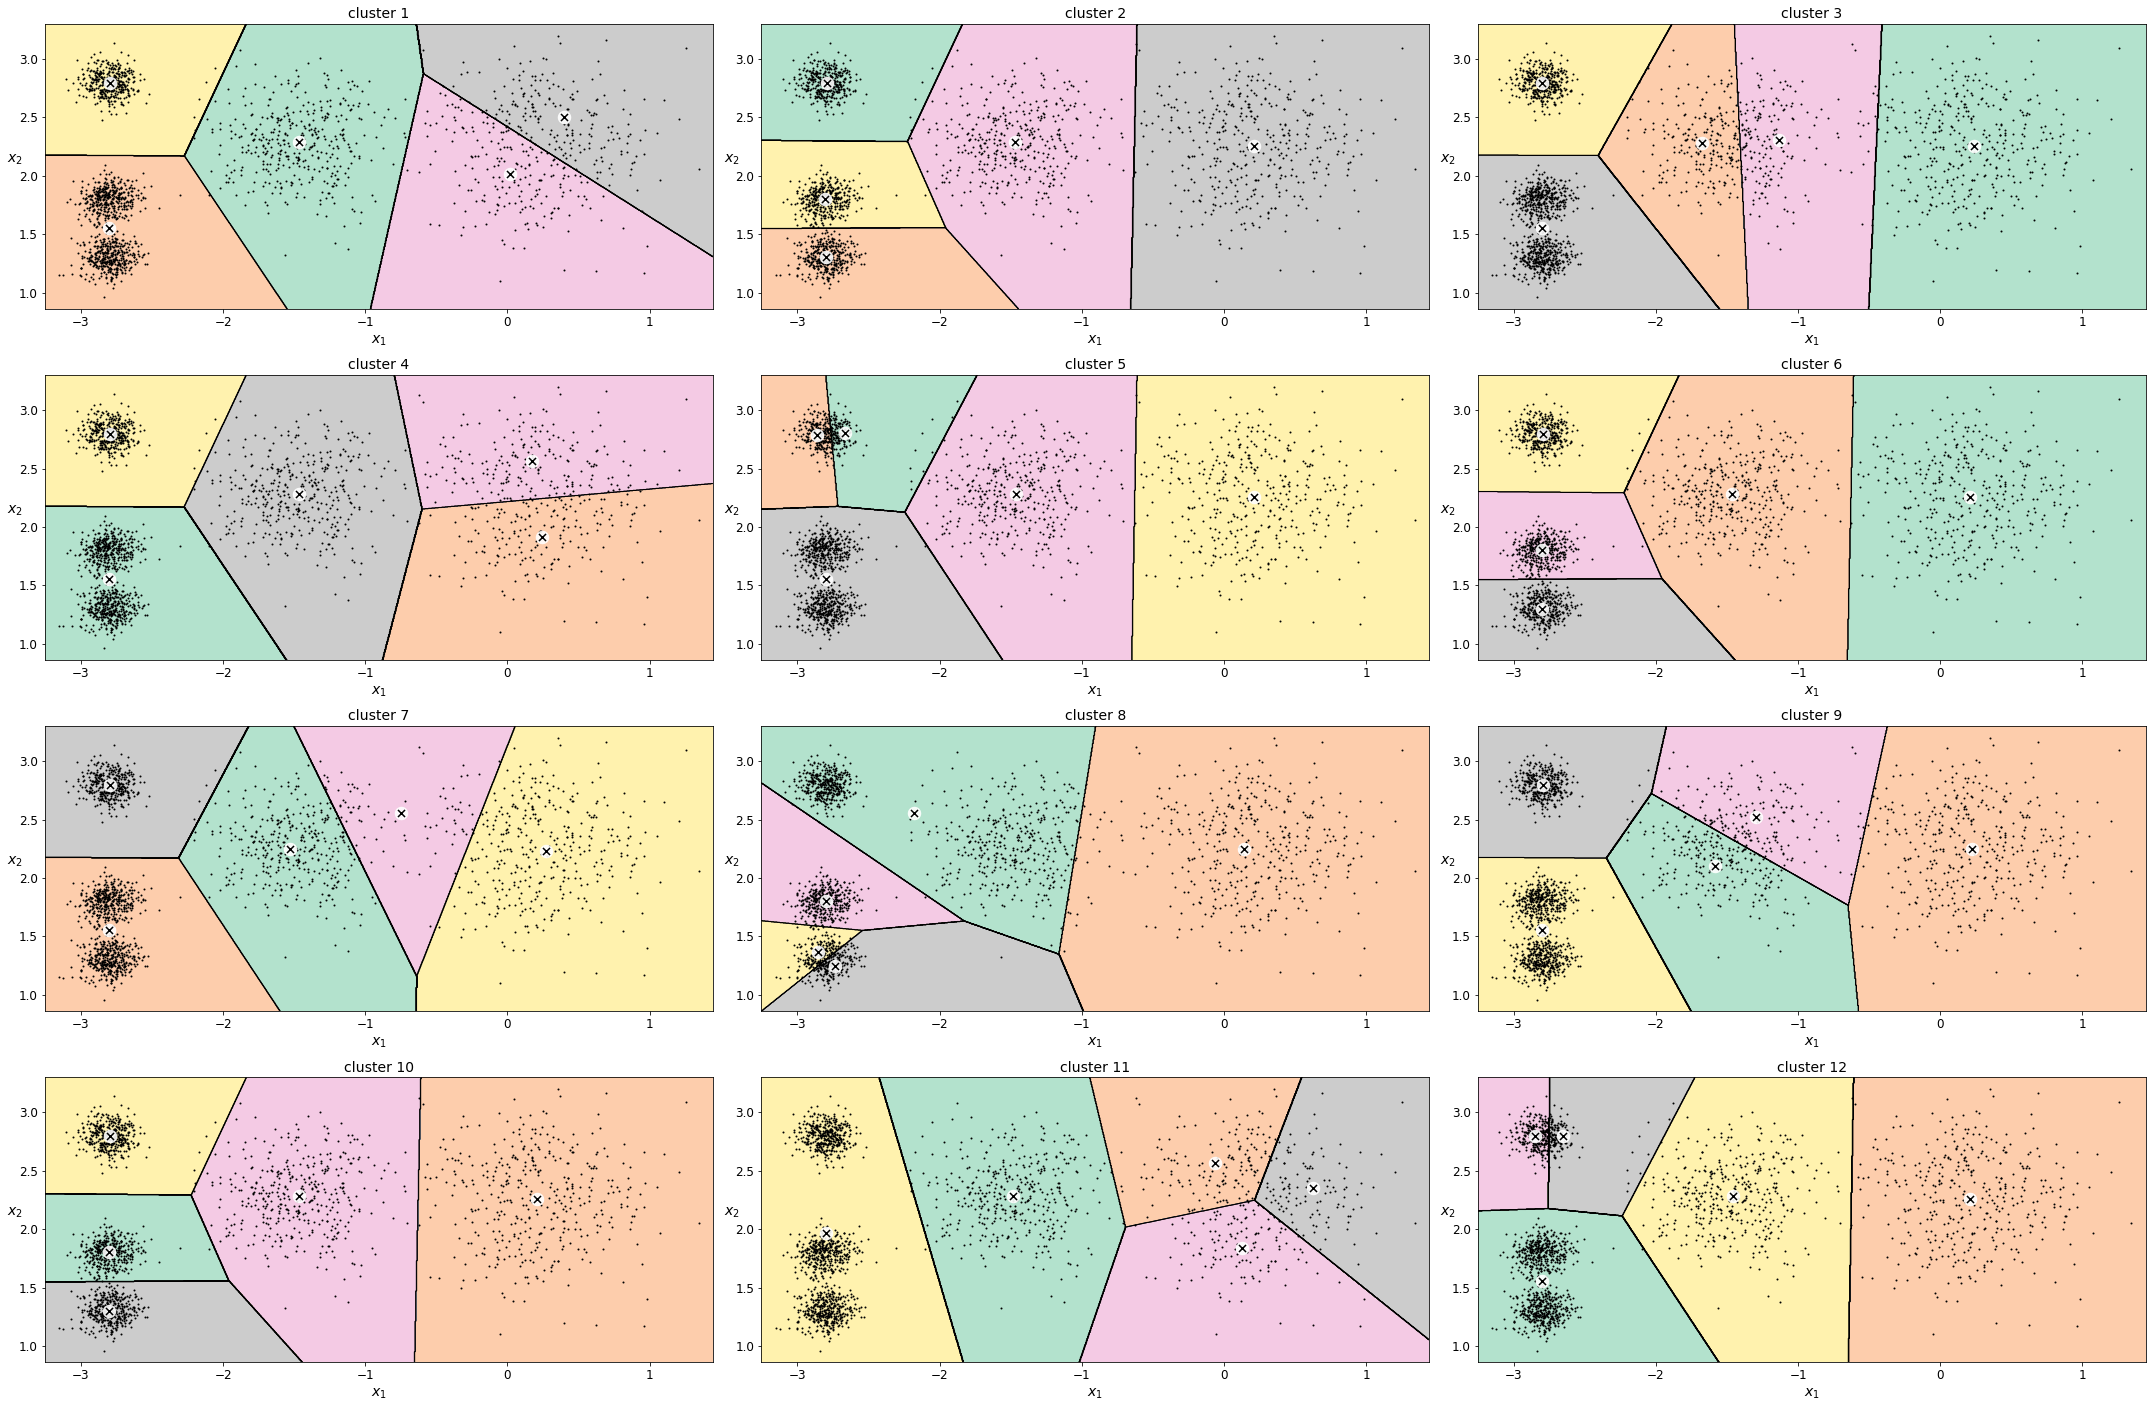

In [107]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

kmeans_rnd_inits = [KMeans(n_clusters=5, init="random", n_init=1, algorithm="full") for _ in range(12)]

#plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
#                          "Solution 1", "Solution 2 (with a different random init)")

plot_clusterers_comparison(kmeans_rnd_inits, X)

save_fig("kmeans_variability_plot")
plt.show()

**Inertia**

In [88]:
print(kmeans.inertia_)
# inertia is the sum of the squared distances between each training instance and its closest centroid:

X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.5985372581684


211.59853725816856

In [89]:
kmeans.score(X)
# returns negative value, because it's optimized -> the grateer, the better

-211.59853725816856

**Multiple Initializations**

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure:


In [111]:
inertias = [kmeans_rnd_init.inertia_ for kmeans_rnd_init in kmeans_rnd_inits]
inertias

[223.29108572819035,
 211.59853725816822,
 236.80956211186646,
 219.82479073500593,
 258.6513051708961,
 211.59853725816822,
 236.77548612029426,
 600.4131331315544,
 236.9691981017313,
 211.59853725816822,
 607.002960238101,
 258.5912416447536]

n_init hyperparameter -> Scikit-Learn runs the original algorithm n_init times
, and selects the solution that minimizes the inertia. 
By default, Scikit-Learn sets n_init=10.

In [100]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)


KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

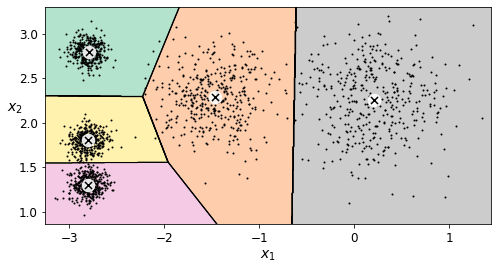

In [101]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

**K-Means++**


Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii:

    Take one centroid $c_1$, chosen uniformly at random from the dataset.
    Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
    Repeat the previous step until all $k$ centroids have been chosen.

The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce n_init considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set init="k-means++" (this is actually the default):


In [108]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [109]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

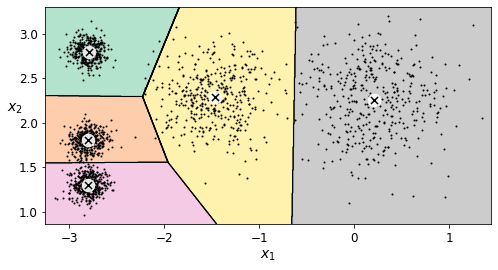

In [110]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

**Accelerated K-Means**

The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this 2003 paper by Charles Elkan for more details).

To use Elkan's variant of K-Means, just set algorithm="elkan". Note that it does not support sparse data, so by default, Scikit-Learn uses "elkan" for dense data, and "full" (the regular K-Means algorithm) for sparse data.


In [112]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

%timeit -n 50 KMeans(algorithm="full").fit(X)

58.9 ms ± 861 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)
79.1 ms ± 878 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


**Mini-Batch K-Means**

Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches

In [113]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [114]:
minibatch_kmeans.inertia_

211.93186531476775

If the dataset does not fit in memory, the simplest option is to use the memmap class

In [115]:
import urllib
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_traintest = train_test_split(mnist["data"], mnist["target"])


In [123]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='w+', shape=X_train.shape)
X_mm[:] = X_train


In [122]:
#del X_mm

In [124]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [125]:
%timeit KMeans(n_clusters=5).fit(X)

%timeit MiniBatchKMeans(n_clusters=5).fit(X)

34.9 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
20.5 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [126]:
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

Saving figure minibatch_kmeans_vs_kmeans


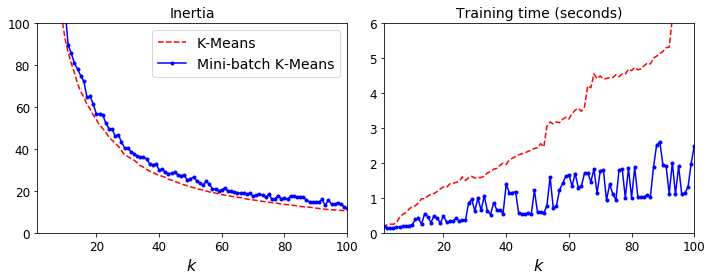

In [127]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

**Finding the optimal number of clusters**

c:\Users\michal\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:26: UserWarning: No contour levels were found within the data range.


Saving figure bad_n_clusters_plot


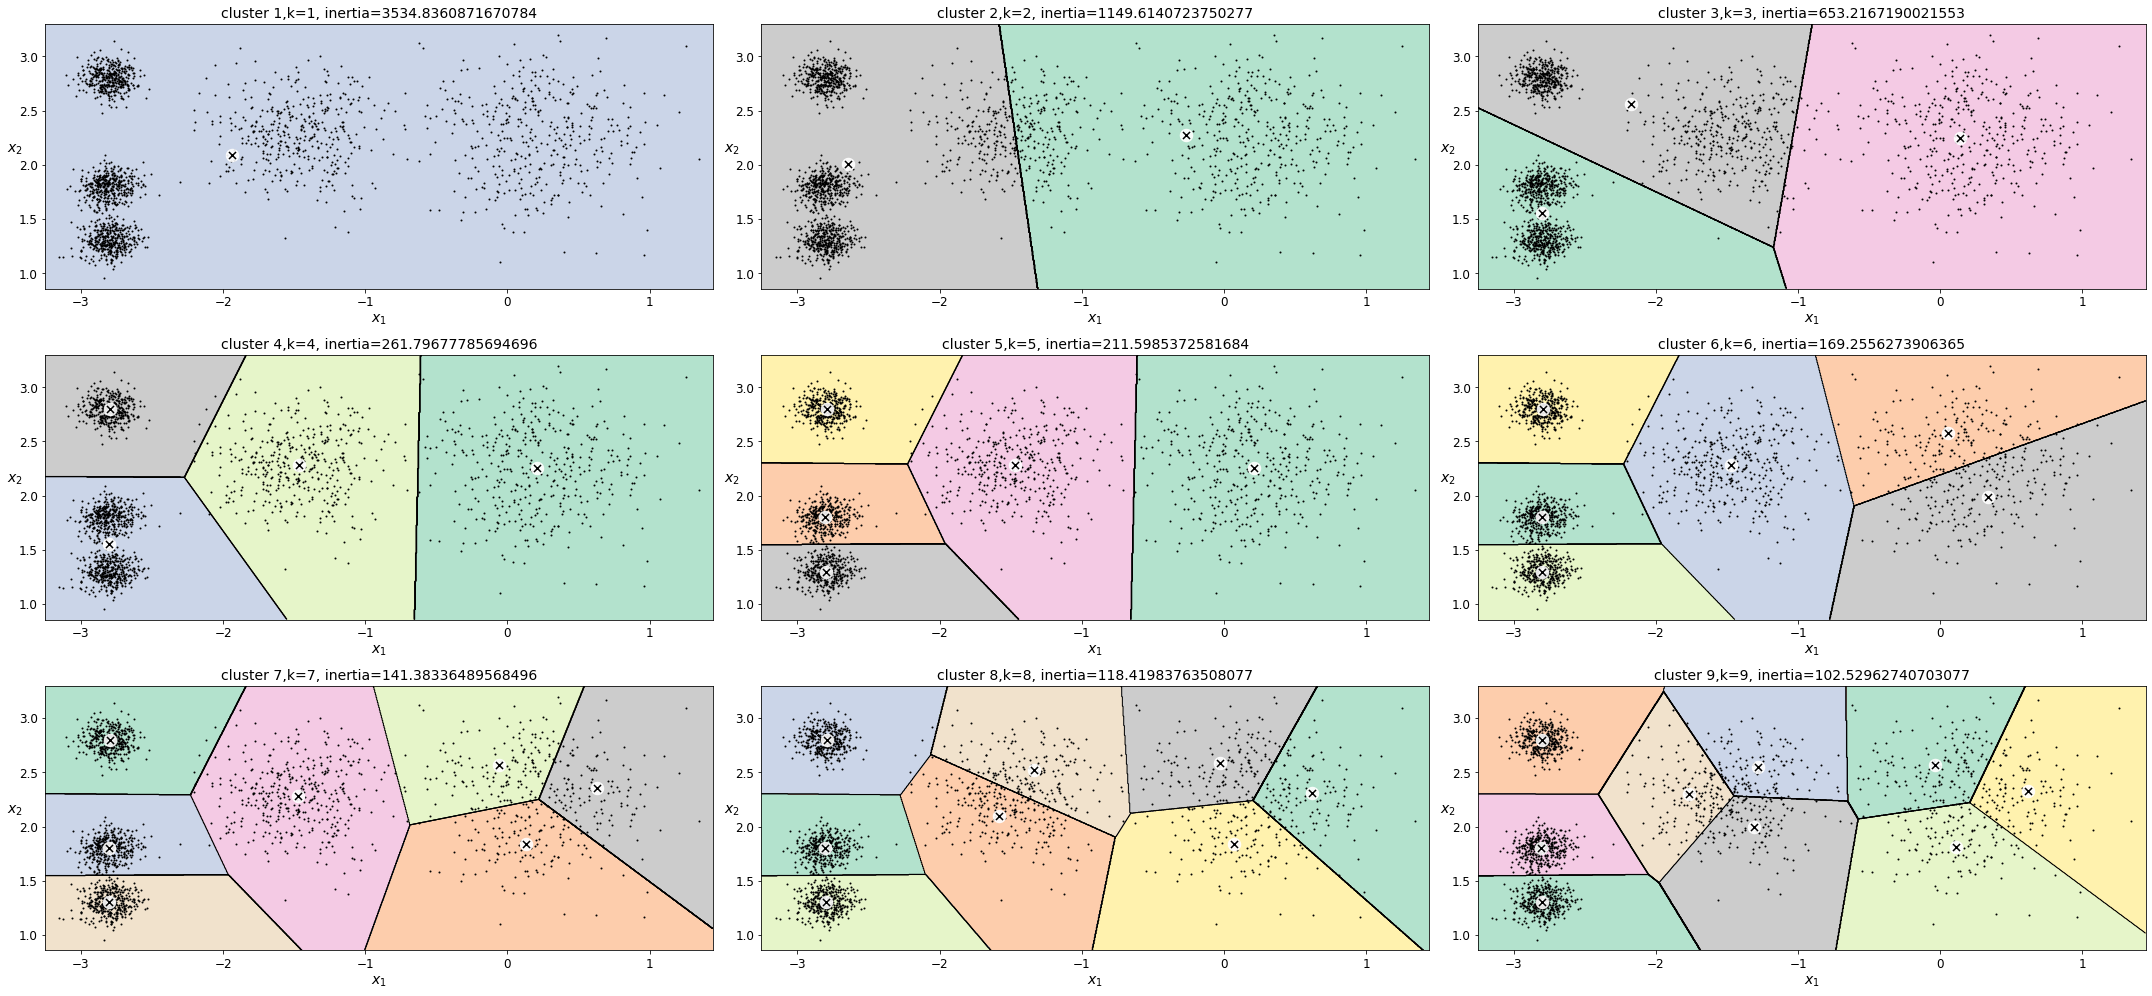

In [133]:
clusterers = [KMeans(n_clusters=k, random_state=42) for k in range(1, 10)]

kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)
#plot_clusterers_comparison(clusterers, X, "$k=3$", "$k=8$")

plot_clusterers_comparison(clusterers, X)
save_fig("bad_n_clusters_plot")
plt.show()



In [134]:
inertias = [model.inertia_ for model in clusterers]

Saving figure inertia_vs_k_plot


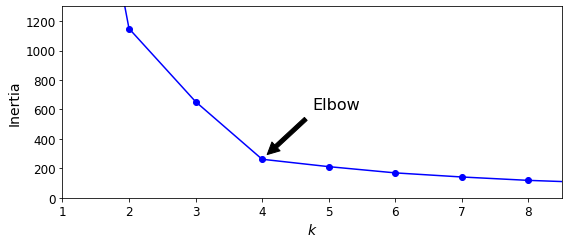

In [136]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

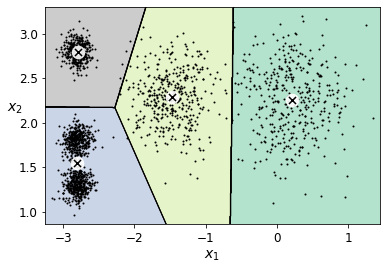

In [137]:
plot_decision_boundaries(clusterers[4-1], X)
plt.show()

Another approach is to look at the silhouette score, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and $b$ is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

(mean_near_cluster_distance - mean_intra_cluster_distance) / 
max(mean_intra_cluster_distance -  mean_near_cluster_distance)

In [138]:
from sklearn.metrics import silhouette_score

In [139]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [141]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in clusterers[1:]] # Number of labels > 1

In [142]:
silhouette_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.6020248775444942,
 0.6068660656395705,
 0.5616191906117943,
 0.5674347733914683]

Saving figure silhouette_score_vs_k_plot


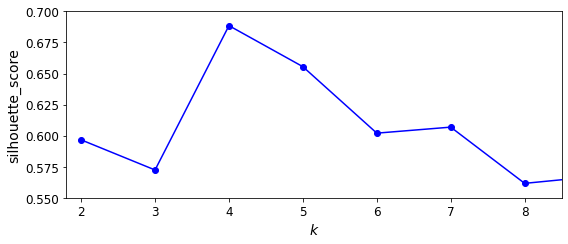

In [147]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("silhouette_score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

Informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram

Saving figure silhouette_analysis_plot


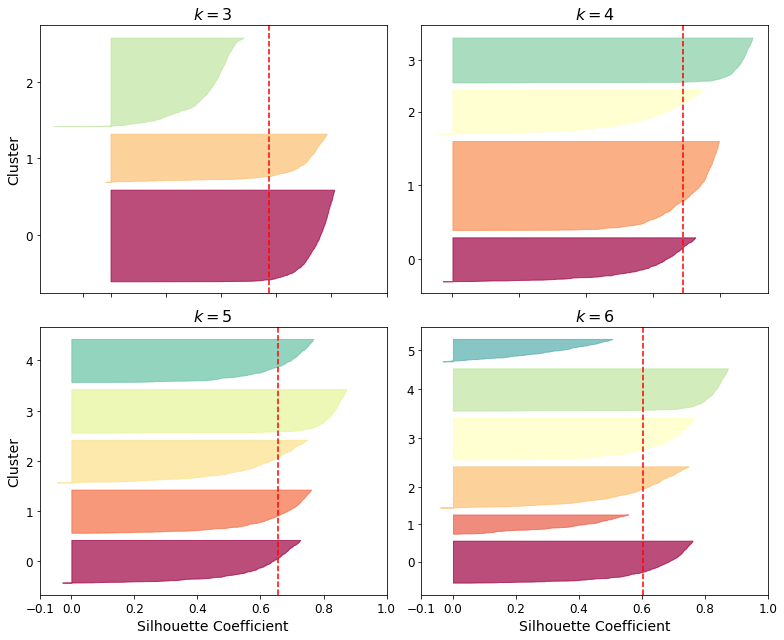

In [149]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

kmeans_per_k = clusterers

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()


**Limits of K-Means**

In [150]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

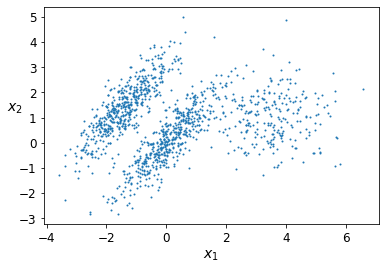

In [151]:
plot_clusters(X)

In [152]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Saving figure bad_kmeans_plot


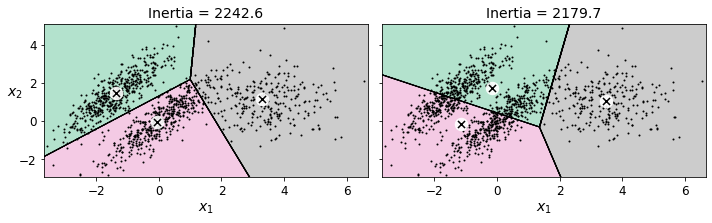

In [154]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

save_fig("bad_kmeans_plot")
plt.show()



**Using clustering for image segmentation**

In [155]:
# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x1e0ce1ae648>)

In [156]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [158]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img.reshape(image.shape)

array([[[0.02091756, 0.10598001, 0.00559016],
        [0.02091756, 0.10598001, 0.00559016],
        [0.02091756, 0.10598001, 0.00559016],
        ...,
        [0.20647109, 0.3730199 , 0.05209464],
        [0.20647109, 0.3730199 , 0.05209464],
        [0.20647109, 0.3730199 , 0.05209464]],

       [[0.02091756, 0.10598001, 0.00559016],
        [0.02091756, 0.10598001, 0.00559016],
        [0.02091756, 0.10598001, 0.00559016],
        ...,
        [0.20647109, 0.3730199 , 0.05209464],
        [0.20647109, 0.3730199 , 0.05209464],
        [0.20647109, 0.3730199 , 0.05209464]],

       [[0.02091756, 0.10598001, 0.00559016],
        [0.02091756, 0.10598001, 0.00559016],
        [0.02091756, 0.10598001, 0.00559016],
        ...,
        [0.20647109, 0.3730199 , 0.05209464],
        [0.20647109, 0.3730199 , 0.05209464],
        [0.20647109, 0.3730199 , 0.05209464]],

       ...,

       [[0.02091756, 0.10598001, 0.00559016],
        [0.02091756, 0.10598001, 0.00559016],
        [0.02091756, 0

In [179]:
segmented_imgs = []
n_colors = np.linspace(start=20, stop=2, endpoint=True, num=10, dtype=np.int32)
n_colors

for n_color in n_colors:
    kmeans =KMeans(n_clusters=n_color, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

10 3 4
Saving figure image_segmentation_diagram


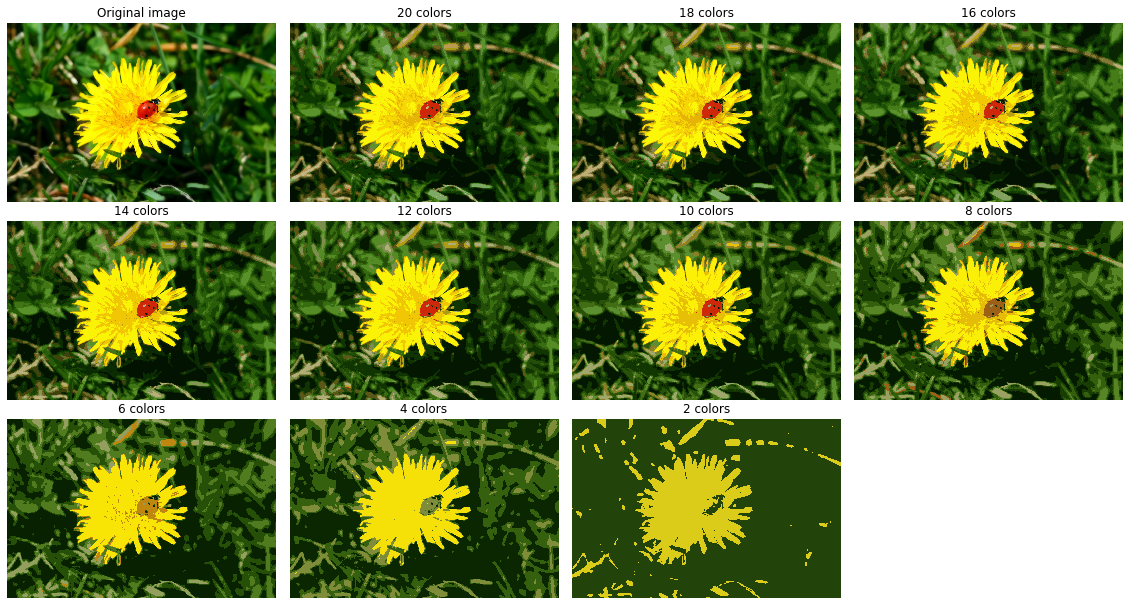

In [187]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.05, hspace=0.1)

all_num = len(n_colors)
columns = 4
rows = all_num // columns + 1

plt.subplot(rows, columns, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(rows, columns, idx + 2)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    
save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()


**Using Clustering for Preprocessing**
Let's tackle the digits dataset which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.

In [188]:
from sklearn.datasets import load_digits

In [189]:
X_digits, y_digits = load_digits(return_X_y=True)

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [194]:
from sklearn.linear_model import LogisticRegression

log_reg  = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
log_reg.score(X_test, y_test)

0.9577777777777777

Use K-Means as a preprocessing step. 
We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters, then apply a logistic regression model:

In [196]:
from sklearn.pipeline import Pipeline

In [201]:
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50, random_state=42)),
    ('log_reg', LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000))
])

pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [202]:
pipeline.score(X_test, y_test)

0.9844444444444445

In [206]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    "kmeans__n_clusters" : list(range(10, 100))
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-2)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-2)]: Done 148 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 270 out of 270 | elapsed:  2.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

In [207]:
print(grid_search.best_params_)
grid_search.score(X_test, y_test)


{'kmeans__n_clusters': 78}


0.9844444444444445

**Clustering for Semi-supervised Learning**
Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.

In [208]:
n_labeled = 50

In [291]:
X_train
y_train

array([5, 2, 0, ..., 2, 7, 1])

In [218]:
log_reg  = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [309]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits  = X_train[representative_digit_idx]

In [292]:
X_representative_digits.shape

(50, 64)

Saving figure representative_images_diagram


<Figure size 432x288 with 0 Axes>

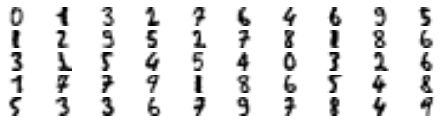

In [310]:
plt.subplots_adjust(bottom=0.1, top=0.2, wspace=0.05, hspace=0.01)

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

Saving figure representative_images_diagram


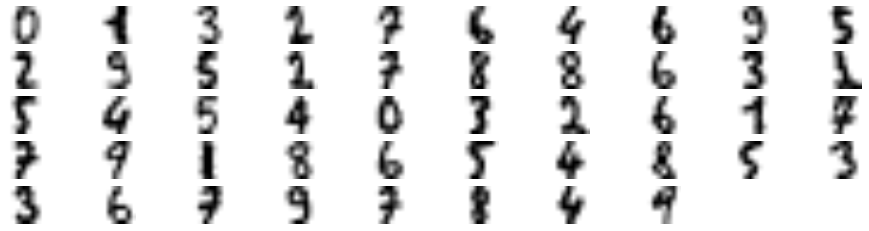

(48, 64) (48,)


In [297]:
#manually done
 
y_representative_digits  = [
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    '?', 2, 9, 5, 2, 7, 8, '?', 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9
]

y_representative_digits_100  = [
    6, 5, 2, 0, 7, 1, 2, '?', 3, 4,
    5, 6, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9
]

y_representative_digits_np = np.array(y_representative_digits)

# cleanup some not recognized digits :/
good_idx = np.where(y_representative_digits_np != '?')
bad_idx = np.where(y_representative_digits_np == '?')

good_X_representative_digits = X_representative_digits[good_idx]
good_y_representative_digits = y_representative_digits_np[good_idx].astype('int')

new_k = len(good_y_representative_digits)

plt.figure(figsize=(16, 4))
for index, X_representative_digit in enumerate(good_X_representative_digits):
    plt.subplot(new_k // 10 + 1, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

print(good_X_representative_digits.shape, good_y_representative_digits.shape)

In [299]:
log_reg  = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000)
#log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.fit(good_X_representative_digits, good_y_representative_digits)
log_reg.score(X_test, y_test)

0.9155555555555556

In [301]:
# Propagate the labels to all the other instances in the same cluster

y_train_propagated = np.empty(len(X_train), dtype=np.int32)

for i in range(new_k):
    y_train_propagated[kmeans.labels_==i] = good_y_representative_digits[i]
    

In [303]:
y_train_propagated

array([2, 7, 2, ..., 3, 7, 2])

In [302]:
log_reg  = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.28

Propagate the labels only to the instances closest to the centroid

In [248]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [249]:
partially_propagated_idx = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated_idx]
y_train_partially_propagated = y_train_propagated[partially_propagated_idx]

In [250]:
X_train_partially_propagated.shape, y_train_partially_propagated.shape

((155, 64), (155,))

In [251]:
log_reg  = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8888888888888888

TODO:
Fix cleanup some not recognized digits

Manually label the instances that the classifier is least sure about, if possible by picking them in distinct clusters.

Train a new model with these additional labels.



**DBSCAN**

For each instance, the algorithm counts how many instances are located within a small eplsilon dostance from it.
If instance has at least min_samples instances in its eps-neighborhood, then it's *core instance* . ( In dense regions )

All instances in the neighborhood of core instance belong to the same cluster. 

Any instance not a core instace and not in neighborhood of is considered an anomaly

In [311]:
from sklearn.datasets import make_moons

In [312]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [313]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [319]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [320]:
len(dbscan.core_sample_indices_)

808

In [321]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [316]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [314]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Saving figure dbscan_plot


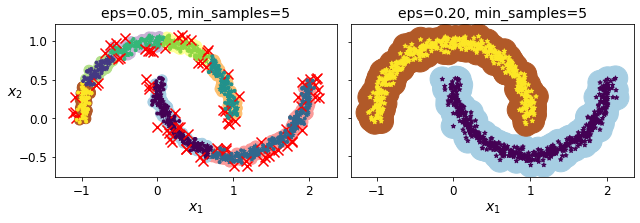

In [317]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

In [324]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

Saving figure cluster_classification_plot


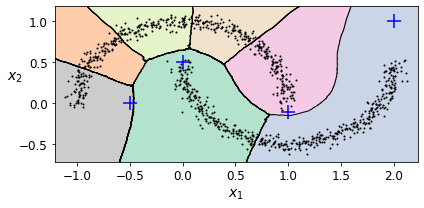

In [325]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

**Gaussian Mixtures**

In [326]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [327]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [330]:
print(gm.weights_)
print(gm.means_)
print(gm.covariances_)
print(gm.converged_)
print(gm.n_iter_)

[0.39032584 0.20961444 0.40005972]
[[ 0.05145113  0.07534576]
 [ 3.39947665  1.05931088]
 [-1.40764129  1.42712848]]
[[[ 0.68825143  0.79617956]
  [ 0.79617956  1.21242183]]

 [[ 1.14740131 -0.03271106]
  [-0.03271106  0.95498333]]

 [[ 0.63478217  0.72970097]
  [ 0.72970097  1.16094925]]]
True
4


You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use predict() method or the predict_proba()

In [331]:
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [332]:
gm.predict_proba(X)

array([[9.76815996e-01, 2.31833274e-02, 6.76282339e-07],
       [9.82914418e-01, 1.64110061e-02, 6.74575575e-04],
       [7.52377580e-05, 1.99781831e-06, 9.99922764e-01],
       ...,
       [4.31902443e-07, 9.99999568e-01, 2.12540639e-26],
       [5.20915318e-16, 1.00000000e+00, 1.45002917e-41],
       [2.30971331e-15, 1.00000000e+00, 7.93266114e-41]])

In [335]:
# Int's generative model.
# new instances can be sampled

X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)

[[-0.86951041 -0.32742378]
 [ 0.29854504  0.28307991]
 [ 1.84860618  2.07374016]
 [ 3.98304484  1.49869936]
 [ 3.8163406   0.53038367]
 [-1.04030781  0.78655831]]
[0 0 1 1 1 2]


In [336]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

Let's check that the PDF integrates to 1 over the whole space. We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). The result is very close to 1:


In [337]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225095

In [338]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure gaussian_mixtures_plot


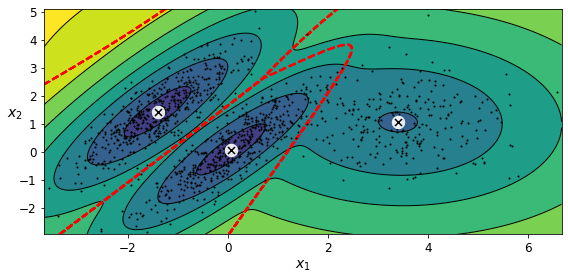

In [339]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

You can impose constraints on the covariance matrices that the algorithm looks for by setting the covariance_type hyperparameter:

    "full" (default): no constraint, all clusters can take on any ellipsoidal shape of any size.
    "tied": all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
    "spherical": all clusters must be spherical, but they can have different diameters (i.e., different variances).
    "diag": clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).

